# Study 1 - Framing of values and ideology

## Basic Statistics
### Loading and preprocessing of the debate transcipts

In [29]:
import nltk
from nltk.corpus import stopwords
import spacy
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter
import openai
from tqdm import tqdm
import numpy as np
from sklearn.metrics import cohen_kappa_score
import krippendorff

[nltk_data] Downloading package stopwords to
[nltk_data]     /mounts/Users/cisintern/pwicke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load the abcnews_transcript file from the data folder
with open('../data/abcnews_transcript.txt', 'r') as file:
    data = file.read()

In [5]:
trumps_responses = []
kamalas_responses = []

trump_identifier = "FORMER PRESIDENT DONALD TRUMP: "
kamala_identifier = "VICE PRESIDENT KAMALA HARRIS: "

for line in data.split('\n'):
    if line.startswith(trump_identifier):
        trumps_responses.append(line[len(trump_identifier):])
    elif line.startswith(kamala_identifier):
        kamalas_responses.append(line[len(kamala_identifier):])

print('Number of Trump responses:', len(trumps_responses))
print('Number of Kamala responses:', len(kamalas_responses))

# print the first response from each
print()
print('Trump:', trumps_responses[0])
print('Kamala:', kamalas_responses[0])

Number of Trump responses: 74
Number of Kamala responses: 34

Trump: Nice to see you. Have fun.
Kamala: Kamala Harris. Let's have a good debate.


### Basic statistics

In [4]:
# Average number of words per response
trump_avg_words = sum([len(response.split()) for response in trumps_responses]) / len(trumps_responses)
kamala_avg_words = sum([len(response.split()) for response in kamalas_responses]) / len(kamalas_responses)

# Average length of words in responses
trump_avg_word_length = sum([len(word) for response in trumps_responses for word in response.split()]) / sum([len(response.split()) for response in trumps_responses])
kamala_avg_word_length = sum([len(word) for response in kamalas_responses for word in response.split()]) / sum([len(response.split()) for response in kamalas_responses])

# Total number of words in all responses
trump_total_words = sum([len(response.split()) for response in trumps_responses])
kamala_total_words = sum([len(response.split()) for response in kamalas_responses])

# Total number of unique words in all responses
trump_unique_words = len(set([word for response in trumps_responses for word in response.split()]))
kamala_unique_words = len(set([word for response in kamalas_responses for word in response.split()]))

# Average number of unique words per response
trump_avg_unique_words = trump_unique_words / len(trumps_responses)
kamala_avg_unique_words = kamala_unique_words / len(kamalas_responses)

# Average number of sentences per response
trump_avg_sentences = sum([response.count('.') for response in trumps_responses]) / len(trumps_responses)
kamala_avg_sentences = sum([response.count('.') for response in kamalas_responses]) / len(kamalas_responses)

# Now we provide an overview of the results with side by side comparison (T | K) rounded to 2 decimal places
print('Descriptive statistics of Trump and Kamala responses: T | K')
print('Number of responses:', len(trumps_responses), '|', len(kamalas_responses))
print('Average number of words per response:', round(trump_avg_words, 2), '|', round(kamala_avg_words, 2))
print('Average length of words in responses:', round(trump_avg_word_length, 2), '|', round(kamala_avg_word_length, 2))
print('Total number of words in all responses:', trump_total_words, '|', kamala_total_words)
print('Total number of unique words in all responses:', trump_unique_words, '|', kamala_unique_words)
print('Average number of unique words per response:', round(trump_avg_unique_words, 2), '|', round(kamala_avg_unique_words, 2))
print('Average number of sentences per response:', round(trump_avg_sentences, 2), '|', round(kamala_avg_sentences, 2))


Descriptive statistics of Trump and Kamala responses: T | K
Number of responses: 74 | 34
Average number of words per response: 109.36 | 173.79
Average length of words in responses: 4.32 | 4.55
Total number of words in all responses: 8093 | 5909
Total number of unique words in all responses: 1745 | 1611
Average number of unique words per response: 23.58 | 47.38
Average number of sentences per response: 10.69 | 10.35


### Create word clouds for visualisation

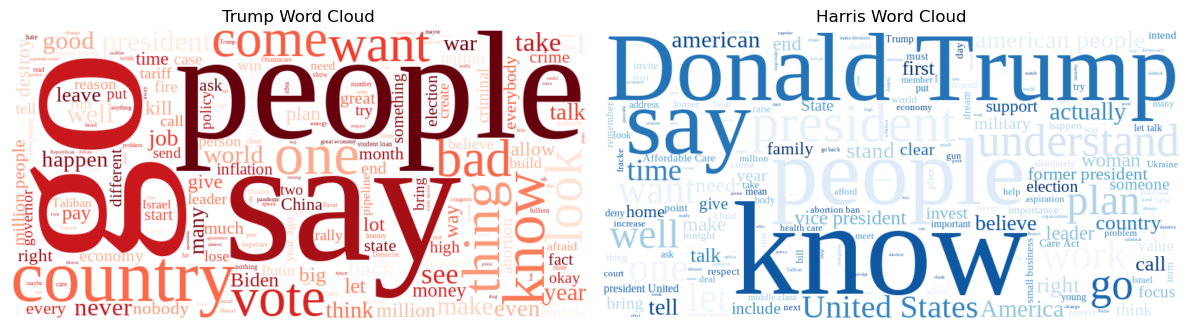

First 5 Trump words: ['nice', 'see', 'fun', 'thank', 'first']
First 5 Harris words: ['Kamala', 'Harris', 'Let', 'good', 'debate']


In [7]:


font_path = fm.findfont(fm.FontProperties(family='Liberation Serif'))
stop_words = set(stopwords.words('english'))

# Remove dots and commas from the responses
trumps_responses = [response.replace('–', '').replace('?', '').replace('’', '').replace('.', '').replace(',', '').replace('--', '').replace('\'re', '').replace('\'m', '') for response in trumps_responses]
kamalas_responses = [response.replace('–', '').replace('?', '').replace('’', '').replace('.', '').replace(',', '').replace('--', '').replace('\'re', '').replace('\'m', '') for response in kamalas_responses]

# Lemmatize the words and remove punctuation as well as words distrupted by punctuation
doc = nlp(' '.join(trumps_responses))
trump_words = [token.lemma_ for token in doc if token.is_alpha]
doc = nlp(' '.join(kamalas_responses))
kamala_words = [token.lemma_ for token in doc if token.is_alpha]

# First lemmatize, then remove stopwords!
trump_words = [word for response in trump_words for word in response.split() if word.lower() not in stop_words]
kamala_words = [word for response in kamala_words for word in response.split() if word.lower() not in stop_words]


# Create word clouds
# Use a red color scheme for trump and a blue color scheme for kamala
trump_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white', colormap='Reds').generate(' '.join(trump_words))
kamala_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white', colormap='Blues').generate(' '.join(kamala_words))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(trump_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trump Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(kamala_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Harris Word Cloud')

plt.tight_layout()
#plt.savefig('../figures/TvK_wordcloud.png', dpi=300, bbox_inches='tight')

plt.show()

# print the first 5 trump and kamala words
print('First 5 Trump words:', trump_words[:5])
print('First 5 Harris words:', kamala_words[:5])

### Top words in responses by candidate

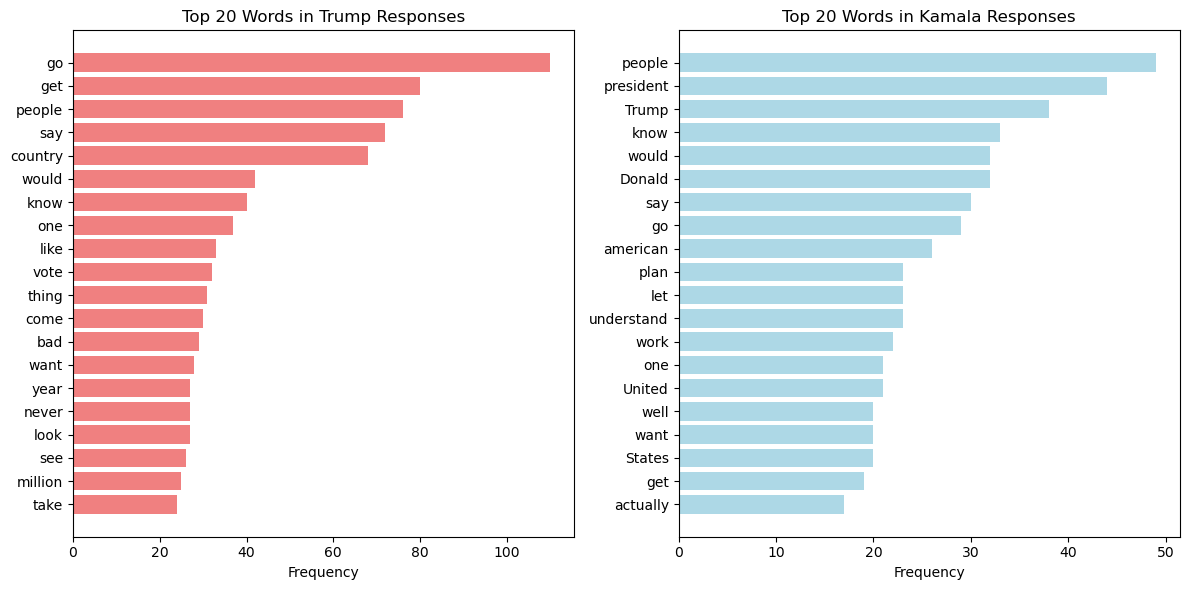

In [8]:
# Now we want to create bar charts to visualize the most common words in the responses of Trump and Kamala
# We will keep the color coding consistent with the word clouds, but in a mute color scheme
# We also want to display the top 10 most common words in each bar chart
# Most frequent words should be at the top of the bar chart

trump_word_freq = Counter(trump_words)
kamala_word_freq = Counter(kamala_words)

trump_top_words = [word for word, _ in trump_word_freq.most_common(20)]
trump_top_freqs = [freq for _, freq in trump_word_freq.most_common(20)]

kamala_top_words = [word for word, _ in kamala_word_freq.most_common(20)]
kamala_top_freqs = [freq for _, freq in kamala_word_freq.most_common(20)]

# Plot the bar charts with most frequent word at the top
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(trump_top_words, trump_top_freqs, color='lightcoral')
plt.xlabel('Frequency')
plt.title('Top 20 Words in Trump Responses')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(kamala_top_words, kamala_top_freqs, color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 20 Words in Kamala Responses')
plt.gca().invert_yaxis()

plt.tight_layout()
#plt.savefig('../figures/TvK_Top20.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Find the most frequent words in Trump and Kamala responses that are not in the other's most frequent words
# We will use the top 20 most frequent words for each

top100_trump = trump_word_freq.most_common(100)
top100_kamala = kamala_word_freq.most_common(100)

trump_unique_words = [(word, freq) for word, freq in top100_trump if word not in [word for word, _ in top100_kamala]]
kamala_unique_words = [(word, freq) for word, freq in top100_kamala if word not in [word for word, _ in top100_trump]]

print('Top 20 unique words in Trump responses:', trump_unique_words[:20])
print('Top 20 unique words in Kamala responses:', kamala_unique_words[:20])

Top 20 unique words in Trump responses: [('like', 33), ('vote', 32), ('thing', 31), ('bad', 29), ('never', 27), ('look', 27), ('see', 26), ('million', 25), ('take', 24), ('good', 21), ('even', 19), ('ever', 18), ('job', 18), ('billion', 16), ('many', 16), ('leave', 15), ('great', 15), ('big', 15), ('pay', 14), ('Biden', 14)]
Top 20 unique words in Kamala responses: [('Donald', 32), ('american', 26), ('understand', 23), ('work', 22), ('States', 20), ('actually', 17), ('America', 17), ('former', 15), ('stand', 14), ('need', 12), ('President', 12), ('woman', 11), ('first', 11), ('tax', 10), ('term', 10), ('home', 9), ('family', 9), ('support', 9), ('business', 9), ('clear', 9)]


### Check the named entities in each response set

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Donald Trump'),
  Text(0, 1, 'John McCain'),
  Text(0, 2, 'Putin'),
  Text(0, 3, 'Joe Biden'),
  Text(0, 4, 'Zelenskyy')])

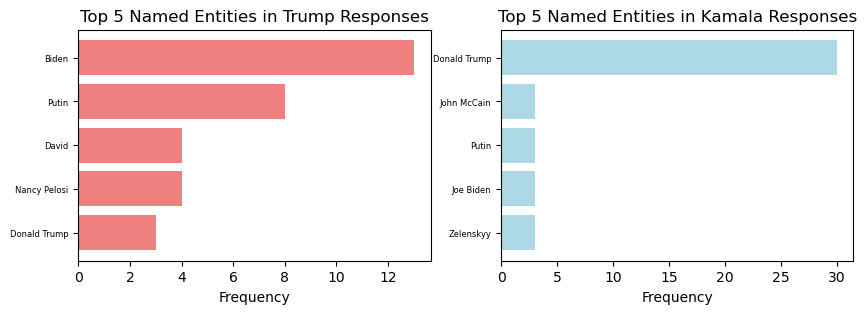

In [10]:
# We want to visualise the most common words that are not verbs or adjectives in the responses of Trump and Kamala
# but named entities

trump_named_entities = [ent.text for response in trumps_responses for ent in nlp(response).ents if ent.label_ == 'PERSON']
kamala_named_entities = [ent.text for response in kamalas_responses for ent in nlp(response).ents if ent.label_ == 'PERSON']

# Remove stopwords from the named entities
trump_named_entities = [entity for entity in trump_named_entities if entity.lower() not in stop_words]
kamala_named_entities = [entity for entity in kamala_named_entities if entity.lower() not in stop_words]

# If entities are in possessive form, remove the 's
trump_named_entities = [entity[:-2] if entity.endswith("'s") else entity for entity in trump_named_entities]
kamala_named_entities = [entity[:-2] if entity.endswith("'s") else entity for entity in kamala_named_entities]

trump_named_entity_freq = Counter(trump_named_entities)
kamala_named_entity_freq = Counter(kamala_named_entities)

trump_top_named_entities = [word for word, _ in trump_named_entity_freq.most_common(5)]
trump_top_named_entity_freqs = [freq for _, freq in trump_named_entity_freq.most_common(5)]

kamala_top_named_entities = [word for word, _ in kamala_named_entity_freq.most_common(5)]
kamala_top_named_entity_freqs = [freq for _, freq in kamala_named_entity_freq.most_common(5)]

# Plot the bar charts with most frequent named entity at the top
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.barh(trump_top_named_entities, trump_top_named_entity_freqs, color='lightcoral')
plt.xlabel('Frequency')
plt.title('Top 5 Named Entities in Trump Responses')
plt.gca().invert_yaxis()
plt.yticks(fontsize=6)

plt.subplot(1, 2, 2)
plt.barh(kamala_top_named_entities, kamala_top_named_entity_freqs, color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 5 Named Entities in Kamala Responses')
plt.gca().invert_yaxis()
plt.yticks(fontsize=6)

#plt.savefig('../figures/TvK_Top5NE.png', dpi=300, bbox_inches='tight')


In [11]:
# How often do either of them use the word "understand" in their responses?
# And how frequently do they use the word "America" in their responses?
trump_understand_freq = trump_word_freq['understand']
kamala_understand_freq = kamala_word_freq['understand']

trump_america_freq = trump_word_freq['America']
kamala_america_freq = kamala_word_freq['America']

print('Frequency of the word "understand" in Trump responses:', trump_understand_freq)
print('Frequency of the word "understand" in Kamala responses:', kamala_understand_freq)
print('Frequency of the word "America" in Trump responses:', trump_america_freq)
print('Frequency of the word "America" in Kamala responses:', kamala_america_freq)

Frequency of the word "understand" in Trump responses: 5
Frequency of the word "understand" in Kamala responses: 23
Frequency of the word "America" in Trump responses: 3
Frequency of the word "America" in Kamala responses: 17


## Framing Analysis

### First step, using GPT-4o to annotate Framings

In [14]:
RATE_LIMIT = 0.5 # seconds after every OpenAI API call
with open('openai_cred.key', 'r') as inf:
    apiKey = inf.readline().strip()
    orgKey = inf.readline().strip()
    projKey = inf.readline().strip()

client = openai.OpenAI(
      api_key=apiKey,
      organization=orgKey,
      project=projKey
)

def prompt_gpt(prompt, tokens=250):
    completion = client.chat.completions.create(
                    model="gpt-4o",
                    messages=[
                    {"role": "user", "content": prompt}],
                    temperature=0,
                    max_tokens=tokens
    )
    return completion.choices[0].message.content


### Define prompt for frame identification

In [15]:
prompt_01 = "Given the following response in a debate, does the response \
make use of figurative frames?\n\
If so, say yes and list the figurative \
frames with their explanation in brackets. \
Do not use new lines for your response. If no figurative frames\
were used, say 'no figurative frames'. Response: "

def annotate_response(response, speaker):
    model_answer = prompt_gpt(prompt_01+response)
    return model_answer

In [17]:
# This code block costs money to run, so it is commented out
if False:
    # annotate all responses by trump and write to a file
    with open('trump_GPT4_FigFrames.txt', 'w') as file:
        file.write("ID\tResponse\tAnnotation\n")

        for idx, response in tqdm(enumerate(trumps_responses)):
            annotation = annotate_response(response, 'Trump')
            file.write(str(idx)+"\t"+response+"\t"+annotation+'\n')

    # annotate all responses by trump and write to a file
    with open('harris_GPT4_FigFrames.txt', 'w') as file:    
        file.write("ID\tResponse\tAnnotation\n")

        for idx, response in tqdm(enumerate(kamalas_responses)):
            annotation = annotate_response(response, 'Harris')
            file.write(str(idx)+"\t"+response+"\t"+annotation+'\n')


In [18]:
# annotate all responses by trump and write to a file
with open('trump_GPT4_FigFrames.txt', 'r') as file:
    # read all lines
    lines = file.readlines()

all_frames = ""
for line in lines:
    for part in line.split("\t"):
        if part.lower().startswith("yes"):
            if "frames: " in part:
                all_frames += line.split(": ")[1].strip()
            elif "frames. " in part:
                all_frames += line.split(". ")[1].strip()

all_frames =  all_frames.replace(").", "),")
print(all_frames)


"country buster" (inflation is described as something that can break up countries), "taking over the towns" (immigrants are described as if they are invading and seizing control of towns), "destroying our country" (immigrants are described as causing severe harm to the nation),"I'm an open book" (metaphor for being transparent and honest), "We got hit with a pandemic" (metaphor for being severely affected by the pandemic), "We handed them over a country" (metaphor for transferring control or responsibility), "Nobody's ever seen anything like it" (hyperbole to emphasize the uniqueness of the situation), "We did things that nobody thought possible" (hyperbole to emphasize the extraordinary achievements),"sound bite" (a brief, catchy statement designed for media consumption), "bring up our worth, our value as a country" (metaphorically increasing the nation's economic and social standing), "run-Spot-run" (a reference to simplistic, elementary-level content, implying her plan is overly sim

### GPT-4o Annotation have been assessed by authors in file:

### `GPT4o_FrameAnnotations.csv`

#### Load individual annotator data

In [125]:
# load the trump_annotatorA.csv file from the data folder
annotator_A = {}
with open('../data/trump_annotatorA.csv', 'r') as file:
    data = file.readlines()
    # store ever other line in the list
    for idx,line in enumerate(data[::2]):
        if line.strip() == '':
            continue
        content = line.split('\t')[2:]
        # drop empty strings from the list
        content = [item for item in content if item.strip() != '']
        annotator_A[idx] = []
        annotator_A[idx].extend(content)

annotator_B = {}
with open('../data/trump_annotatorB.csv', 'r') as file:
    data = file.readlines()
    # store ever other line in the list
    for idx,line in enumerate(data[::2]):
        if line.strip() == '':
            continue
        content = line.split('\t')[2:]
        # drop empty strings from the list
        content = [item for item in content if item.strip() != '']
        annotator_B[idx] = []
        annotator_B[idx].extend(content)

agreements = {}
with open('../data/agreementsTrump.csv', 'r') as file:
    data = file.readlines()
    # store ever other line in the list
    for idx,line in enumerate(data):
        if line.strip() == '':
            continue
        content = line.split('\t')[2:]
        # drop empty strings from the list
        content = [item for item in content if item.strip() != '']
        agreements[idx] = []
        agreements[idx].extend(content)



`Correctly identified` is a `True` label (1). Everything else is a `false` (0). If one annotator has annotated more than the other, insert (0).

In [126]:
list_a = []
list_b = []

for key in annotator_A.keys():

    for idx, item in enumerate(annotator_A[key]):
        if item.strip() == 'Correctly identified':
            list_a.append(1)
        elif item == 'Falsely Identified':
            list_a.append(2)
        elif item == 'Not identified':
            if agreements[key][idx] == '0':
                list_a.append(3)
            else:
                list_a.append(4)    
        else:
            print('Error:', item)    
    
    for idx, item in enumerate(annotator_B[key]):
        if annotator_B[key][idx].strip() == 'Correctly identified':
            list_b.append(1)
        elif item == 'Falsely Identified':
            list_b.append(2)
        elif item == 'Not identified':
            if agreements[key][idx] == '0':
                list_b.append(3)
            else:
                list_b.append(5)     
        else:
            print('Error:', item, idx, key, annotator_B[key][idx])    

    if len(annotator_A[key]) < len(annotator_B[key]):
        for i in range(len(annotator_B[key]) - len(annotator_A[key])):
            list_a.append(6)

    if len(annotator_B[key]) < len(annotator_A[key]):
        for i in range(len(annotator_A[key]) - len(annotator_B[key])):
            list_b.append(6)


In [127]:
print(len(list_a), len(list_b))

185 185


In [117]:
# Use the krirpendorff package to calculate the Krippendorff's Alpha
alpha = krippendorff.alpha(reliability_data=[list_a, list_b])

print(f"Krippendorff's Alpha: {alpha:.4f}")


Krippendorff's Alpha: 0.8297


### Do the same for Harris' data

In [118]:
# load the trump_annotatorA.csv file from the data folder
annotator_A = {}
with open('../data/harris_annotatorA.csv', 'r') as file:
    data = file.readlines()
    # store ever other line in the list
    for idx,line in enumerate(data[::2]):
        if line.strip() == '':
            continue
        content = line.split('\t')[2:]
        # drop empty strings from the list
        content = [item for item in content if item.strip() != '']
        annotator_A[idx] = []
        annotator_A[idx].extend(content)

annotator_B = {}
with open('../data/harris_annotatorB.csv', 'r') as file:
    data = file.readlines()
    # store ever other line in the list
    for idx,line in enumerate(data[::2]):
        if line.strip() == '':
            continue
        content = line.split('\t')[2:]
        # drop empty strings from the list
        content = [item for item in content if item.strip() != '']
        annotator_B[idx] = []
        annotator_B[idx].extend(content)

agreements = {}
with open('../data/agreementsHarris.csv', 'r') as file:
    data = file.readlines()
    # store ever other line in the list
    for idx,line in enumerate(data):
        if line.strip() == '':
            continue
        content = line.split('\t')[2:]
        # drop empty strings from the list
        content = [item for item in content if item.strip() != '']
        agreements[idx] = []
        agreements[idx].extend(content)



In [119]:
list_a = []
list_b = []

for key in annotator_A.keys():

    for idx, item in enumerate(annotator_A[key]):
        if item.strip() == 'Correctly identified':
            list_a.append(1)
        elif item == 'Falsely Identified':
            list_a.append(2)
        elif item == 'Not identified':
            if agreements[key][idx] == '0':
                list_a.append(3)
            else:
                list_a.append(4)  
        else:
            print('Error:', item)    
    
    for idx, item in enumerate(annotator_B[key]):
        if annotator_B[key][idx].strip() == 'Correctly identified':
            list_b.append(1)
        elif item == 'Falsely Identified':
            list_b.append(2)
        elif item == 'Not identified':
            if agreements[key][idx] == '0':
                list_b.append(3)
            else:
                list_b.append(5)     
        else:
            print('Error:', item, idx, key, annotator_B[key][idx])    

    if len(annotator_A[key]) < len(annotator_B[key]):
        for i in range(len(annotator_B[key]) - len(annotator_A[key])):
            list_a.append(6)

    if len(annotator_B[key]) < len(annotator_A[key]):
        for i in range(len(annotator_A[key]) - len(annotator_B[key])):
            list_b.append(6)


In [120]:
print(len(list_a), len(list_b))

129 129


In [122]:
# Use the krirpendorff package to calculate the Krippendorff's Alpha
alpha = krippendorff.alpha(reliability_data=[list_a, list_b])

print(f"Krippendorff's Alpha: {alpha:.4f}")

Krippendorff's Alpha: 0.8867


### Analysis of distribution of framings

In [132]:
# Load the final identified frames which are stored in final_frames_trump.csv 
# where each line corresponds to a response that has one or more identified frames

identified_frames_trump = {}
with open('../data/final_frames_trump.csv', 'r') as file:
    data = file.readlines()
    # store ever other line in the list
    for idx,line in enumerate(data):
        if line.strip() == '':
            continue
        content = line.split('\t')
        # drop empty strings from the list
        content = [item for item in content if item.strip() != '']
        identified_frames_trump[idx] = []
        identified_frames_trump[idx].extend(content)
    
identified_frames_harris = {}
with open('../data/final_frames_harris.csv', 'r') as file:
    data = file.readlines()
    # store ever other line in the list
    for idx,line in enumerate(data):
        if line.strip() == '':
            continue
        content = line.split('\t')
        # drop empty strings from the list
        content = [item for item in content if item.strip() != '']
        identified_frames_harris[idx] = []
        identified_frames_harris[idx].extend(content)

In [135]:
# Count the total number of identified frames for Trump and Harris
total_frames_trump = sum([len(frames) for frames in identified_frames_trump.values()])
total_frames_harris = sum([len(frames) for frames in identified_frames_harris.values()])
print('Total number of identified frames for Trump:', total_frames_trump)
print('Total number of identified frames for Harris:', total_frames_harris)

# Evaluate the average number of figurative frames per response for Trump and Harris
no_trump_responses = 74
no_harris_responses = 34

avg_frames_trump = total_frames_trump / no_trump_responses
avg_frames_harris = total_frames_harris / no_harris_responses
print('Average number of identified frames per response for Trump:', avg_frames_trump)
print('Average number of identified frames per response for Harris:', avg_frames_harris)

Total number of identified frames for Trump: 111
Total number of identified frames for Harris: 93
Average number of identified frames per response for Trump: 1.5
Average number of identified frames per response for Harris: 2.735294117647059
